In [1]:
from sciml.model.fno import FNO
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')

2025-03-08 22:24:08.524010: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-08 22:24:08.535301: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741469048.549038   94231 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741469048.553013   94231 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 22:24:08.569269: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [70]:
p_1 = 400
p_2 = 40
p_3 = 1
epochs = 30  

In [71]:
first_network = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(p_1,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(p_2, activation='relu'),
])

last_network = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(p_2,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(p_3, activation='relu'),
])

In [72]:
folder_path = "data/test_data/example_data_fno/heat2d/"

In [73]:
n_layers = 3
n_modes = p_2 # we use the same number of modes for the network, perfect fourier transform with well known heisenberg inequality (supp )*(supp F) >= n_modes

activation = 'relu'
kernel_initializer = 'he_normal'
device = "GPU"
n_epochs = epochs


In [74]:
model = FNO(regular_params={"first_network": first_network, "last_network": last_network},fourier_params={"n_layers": n_layers, "n_modes": n_modes, "activation": activation, "kernel_initializer": kernel_initializer}, hyper_params={"p_1": p_1, "p_2": p_2,'p_3':p_3,"device": device,"n_epochs":n_epochs})

INFO:sciml.model.fno.fno:Model initialized with 30 epochs, 32 batch size, 0.001 learning rate


In [75]:
mus, xs, sol = model.get_data(folder_path)

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 1622.19it/s]


In [76]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(40, 400)
(40, 8000, 3)
(40, 8000)


In [77]:
train_history = model.fit()

Training progress:   0%|          | 0/30 [00:00<?, ?it/s]

INFO:sciml.model.fno.fno:Epoch 0 completed
Training progress:   3%|▎         | 1/30 [00:00<00:07,  3.74it/s]

2025-03-09 00:25:55.910732: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.fno.fno:Epoch 1 completed
Training progress:   7%|▋         | 2/30 [00:00<00:06,  4.32it/s]

INFO:sciml.model.fno.fno:Epoch 2 completed
Training progress:  10%|█         | 3/30 [00:00<00:05,  4.56it/s]

INFO:sciml.model.fno.fno:Epoch 3 completed
Training progress:  13%|█▎        | 4/30 [00:00<00:05,  4.78it/s]

INFO:sciml.model.fno.fno:Epoch 4 completed
Training progress:  17%|█▋        | 5/30 [00:01<00:05,  4.80it/s]

INFO:sciml.model.fno.fno:Epoch 5 completed
Training progress:  20%|██        | 6/30 [00:01<00:04,  4.91it/s]

INFO:sciml.model.fno.fno:Epoch 6 completed
Training progress:  23%|██▎       | 7/30 [00:01<00:04,  4.60it/s]

INFO:sciml.model.fno.fno:Epoch 7 completed
Training progress:  27%|██▋       | 8/30 [00:01<00:04,  4.52it/s]

INFO:sciml.model.fno.fno:Epoch 8 completed
Training progress:  30%|███       | 9/30 [00:01<00:04,  4.38it/s]

2025-03-09 00:25:57.736459: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.fno.fno:Epoch 9 completed
Training progress:  33%|███▎      | 10/30 [00:02<00:05,  3.96it/s]

INFO:sciml.model.fno.fno:Epoch 10 completed
Training progress:  37%|███▋      | 11/30 [00:02<00:04,  4.04it/s]

INFO:sciml.model.fno.fno:Epoch 11 completed
Training progress:  40%|████      | 12/30 [00:02<00:04,  4.20it/s]

INFO:sciml.model.fno.fno:Epoch 12 completed
Training progress:  43%|████▎     | 13/30 [00:02<00:04,  4.25it/s]

INFO:sciml.model.fno.fno:Epoch 13 completed
Training progress:  47%|████▋     | 14/30 [00:03<00:03,  4.19it/s]

INFO:sciml.model.fno.fno:Epoch 14 completed
Training progress:  50%|█████     | 15/30 [00:03<00:03,  4.16it/s]

INFO:sciml.model.fno.fno:Epoch 15 completed
Training progress:  53%|█████▎    | 16/30 [00:03<00:03,  4.20it/s]

INFO:sciml.model.fno.fno:Epoch 16 completed
Training progress:  57%|█████▋    | 17/30 [00:03<00:03,  4.31it/s]

INFO:sciml.model.fno.fno:Epoch 17 completed
Training progress:  60%|██████    | 18/30 [00:04<00:02,  4.32it/s]

INFO:sciml.model.fno.fno:Epoch 18 completed
Training progress:  63%|██████▎   | 19/30 [00:04<00:02,  4.33it/s]

INFO:sciml.model.fno.fno:Epoch 19 completed


INFO:sciml.model.fno.fno:Epoch 20 completed


INFO:sciml.model.fno.fno:Epoch 21 completed


INFO:sciml.model.fno.fno:Epoch 22 completed


INFO:sciml.model.fno.fno:Epoch 23 completed


INFO:sciml.model.fno.fno:Epoch 24 completed


2025-03-09 00:25:58.899771: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.fno.fno:Epoch 25 completed


INFO:sciml.model.fno.fno:Epoch 26 completed


INFO:sciml.model.fno.fno:Epoch 27 completed


INFO:sciml.model.fno.fno:Epoch 28 completed


INFO:sciml.model.fno.fno:Epoch 29 completed
Training progress: 100%|██████████| 30/30 [00:04<00:00,  6.93it/s]


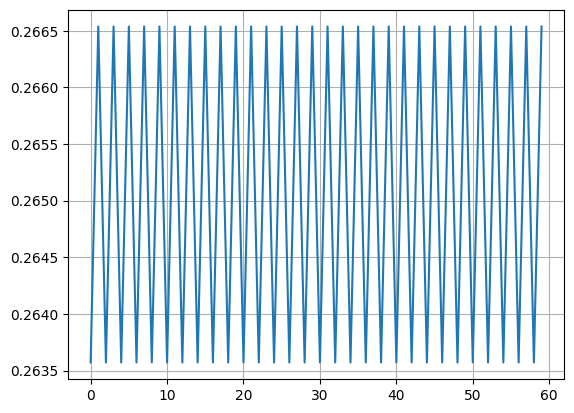

In [78]:
plt.plot(train_history)
plt.grid()
plt.show()